## 1 데이터 시각화가 필요한 이유

### 앤스콤 4분할 그래프 살펴보기

#### 앤스콤 데이터 집합 불러온 후 그래프 그리기

In [1]:
import seaborn as sns

anscombe = sns.load_dataset('anscombe')
print(anscombe)

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

In [2]:
print(type(anscombe))

<class 'pandas.core.frame.DataFrame'>


In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [4]:
dataset_1 = anscombe[anscombe['dataset'] == 'I']

<IPython.core.display.Javascript object>


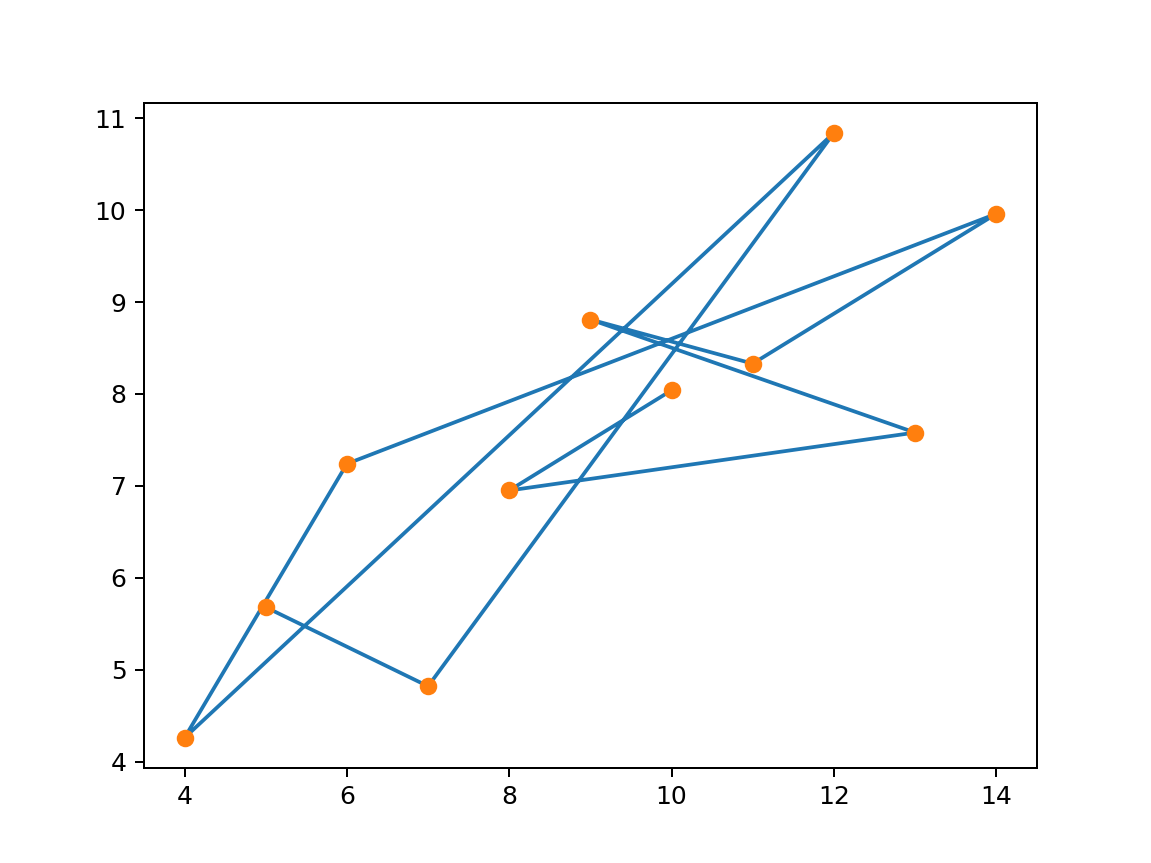

In [5]:
plt.plot(dataset_1['x'], dataset_1['y'])

In [6]:
plt.plot(dataset_1['x'], dataset_1['y'], 'o')

### 앤스콤 데이터 집합 모두 사용해 그래프 만들기

#### 한 번에 4개의 그래프 그리기

In [7]:
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

<IPython.core.display.Javascript object>


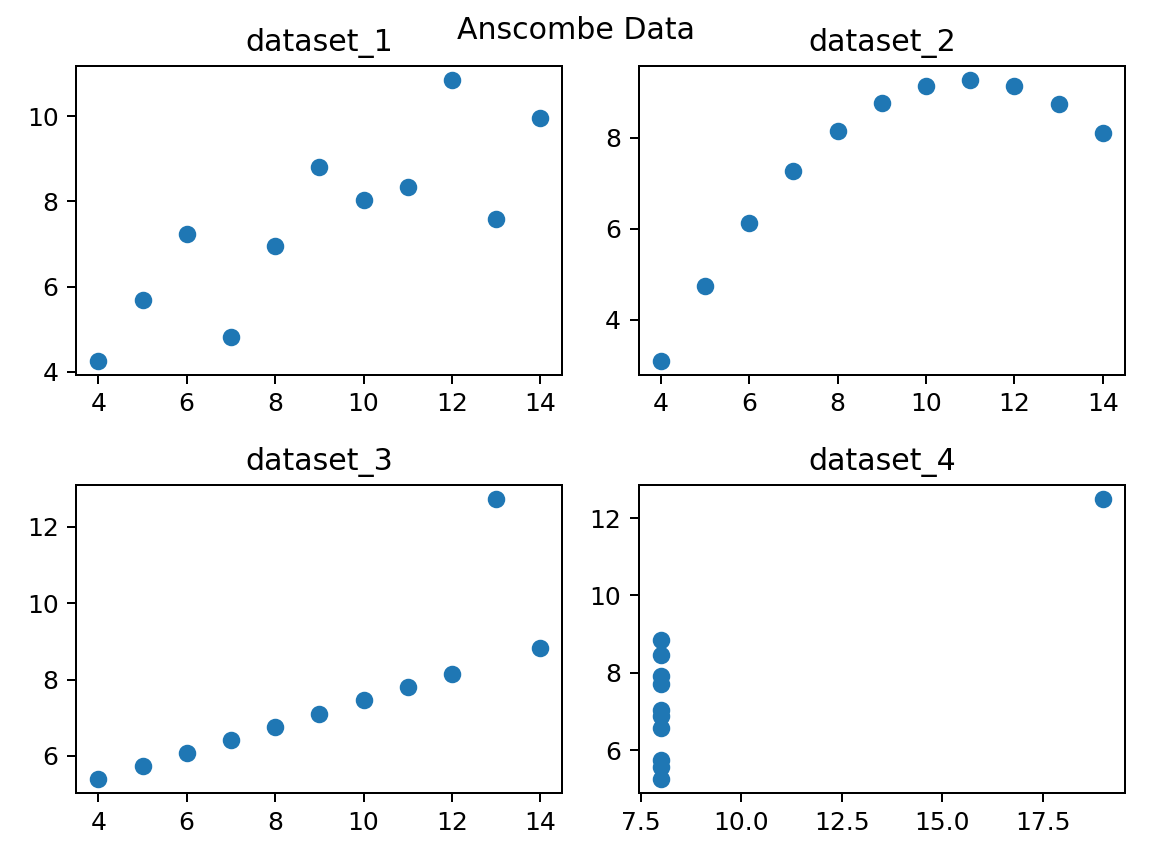

<IPython.core.display.Javascript object>


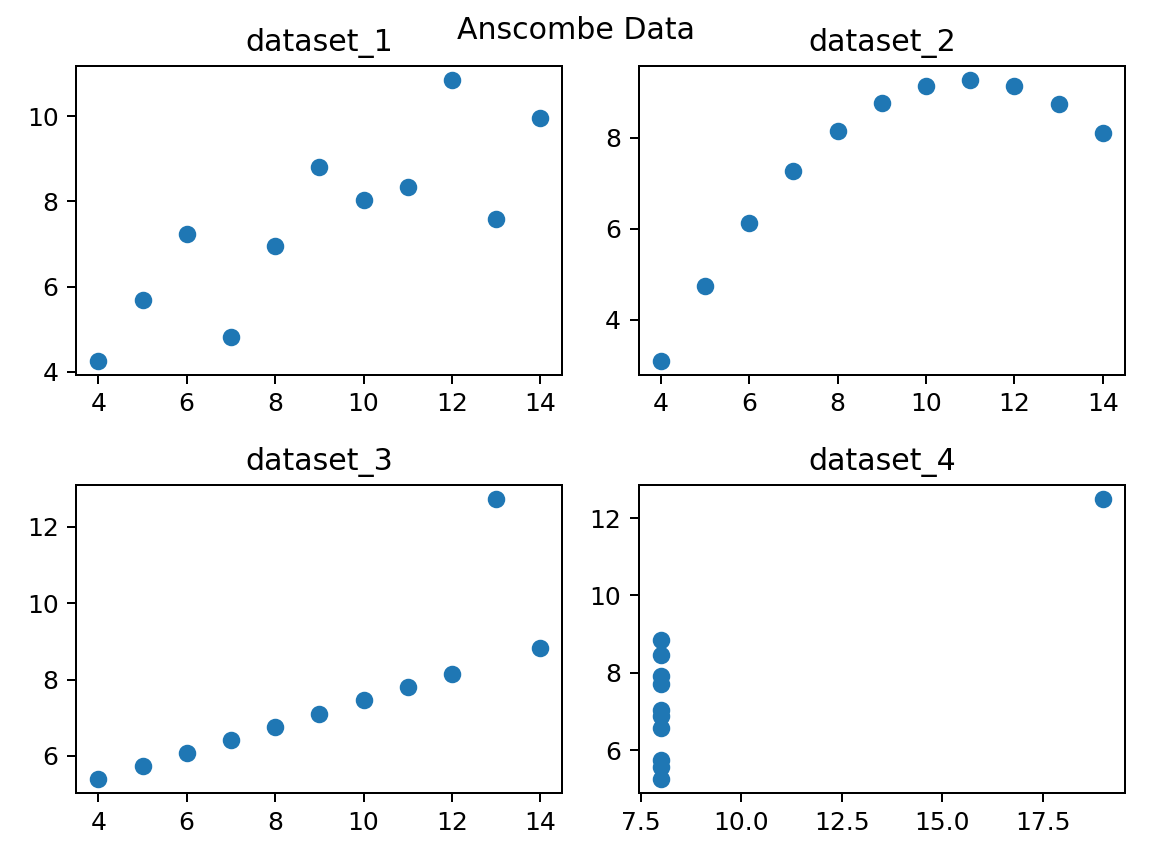

In [8]:
fig = plt.figure()

axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

fig

<IPython.core.display.Javascript object>


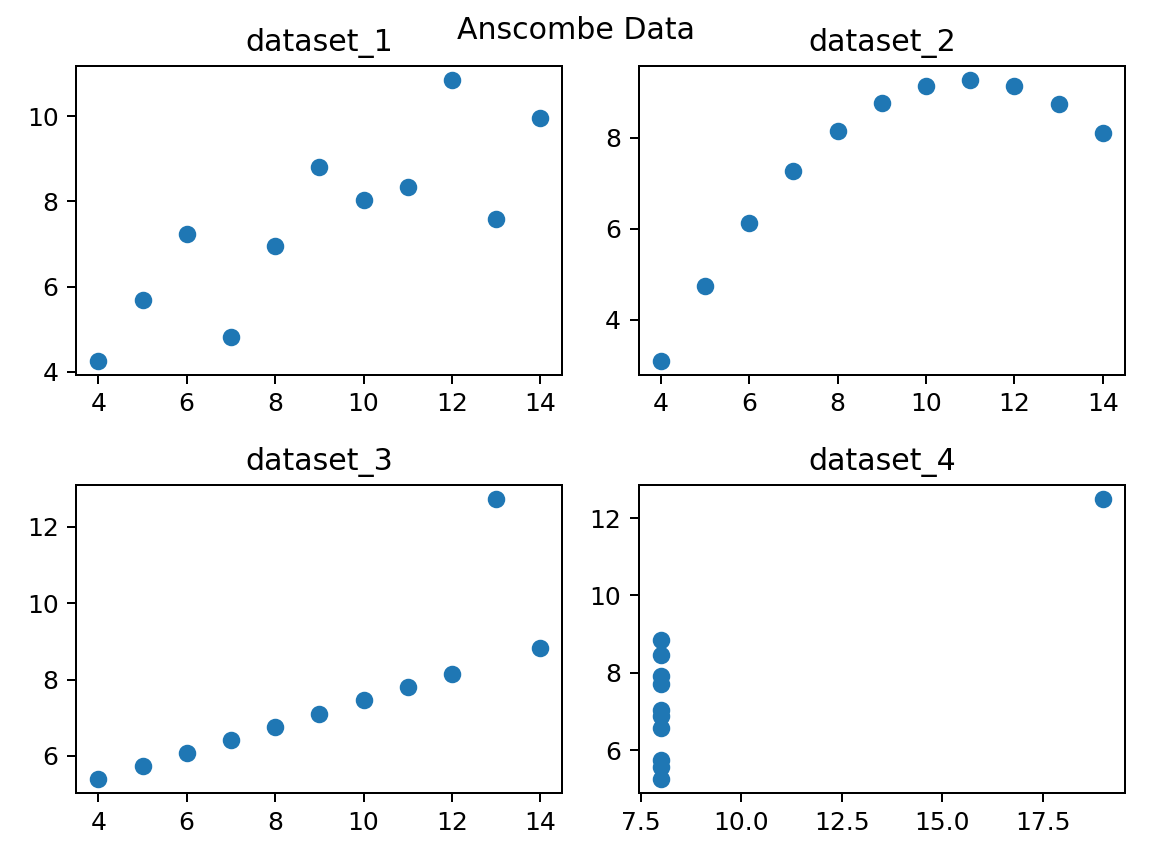

In [9]:
axes1.set_title('dataset_1')
axes2.set_title('dataset_2')
axes3.set_title('dataset_3')
axes4.set_title('dataset_4')

fig

<IPython.core.display.Javascript object>


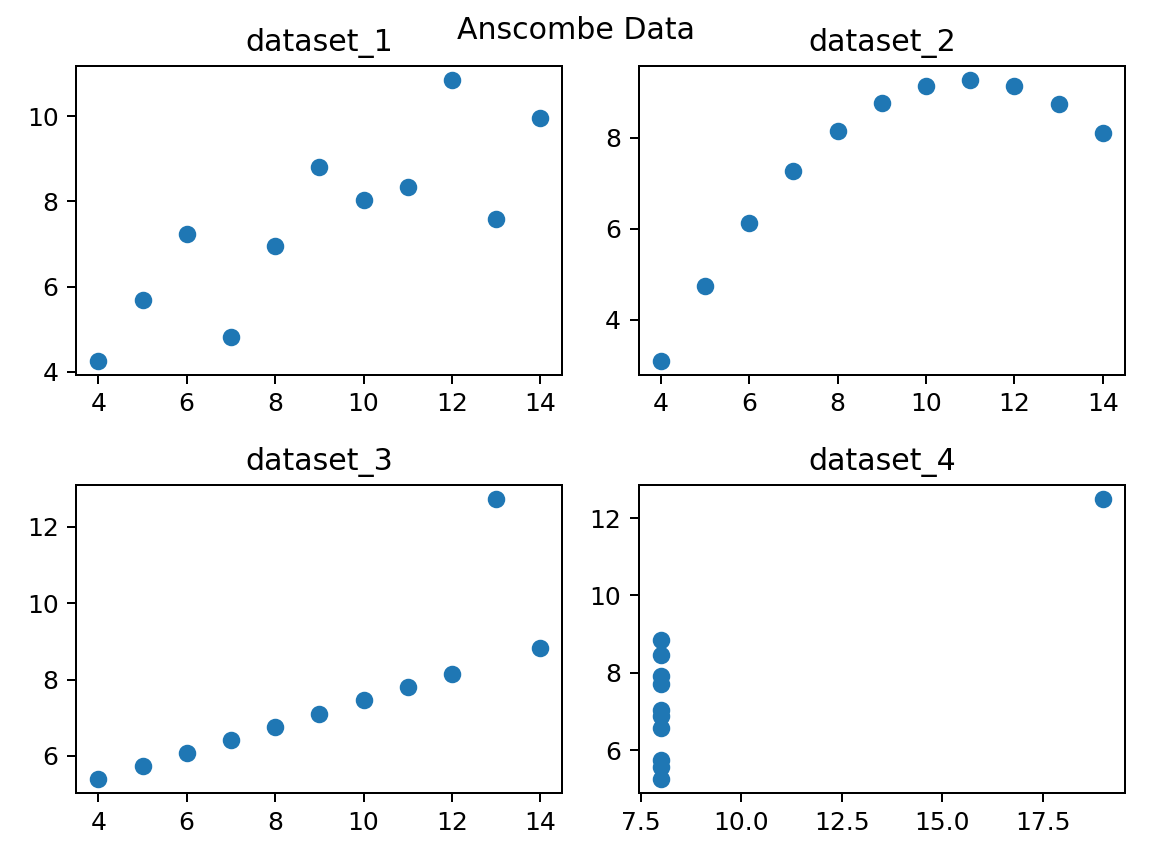

In [10]:
fig.suptitle('Anscombe Data')

fig

<IPython.core.display.Javascript object>


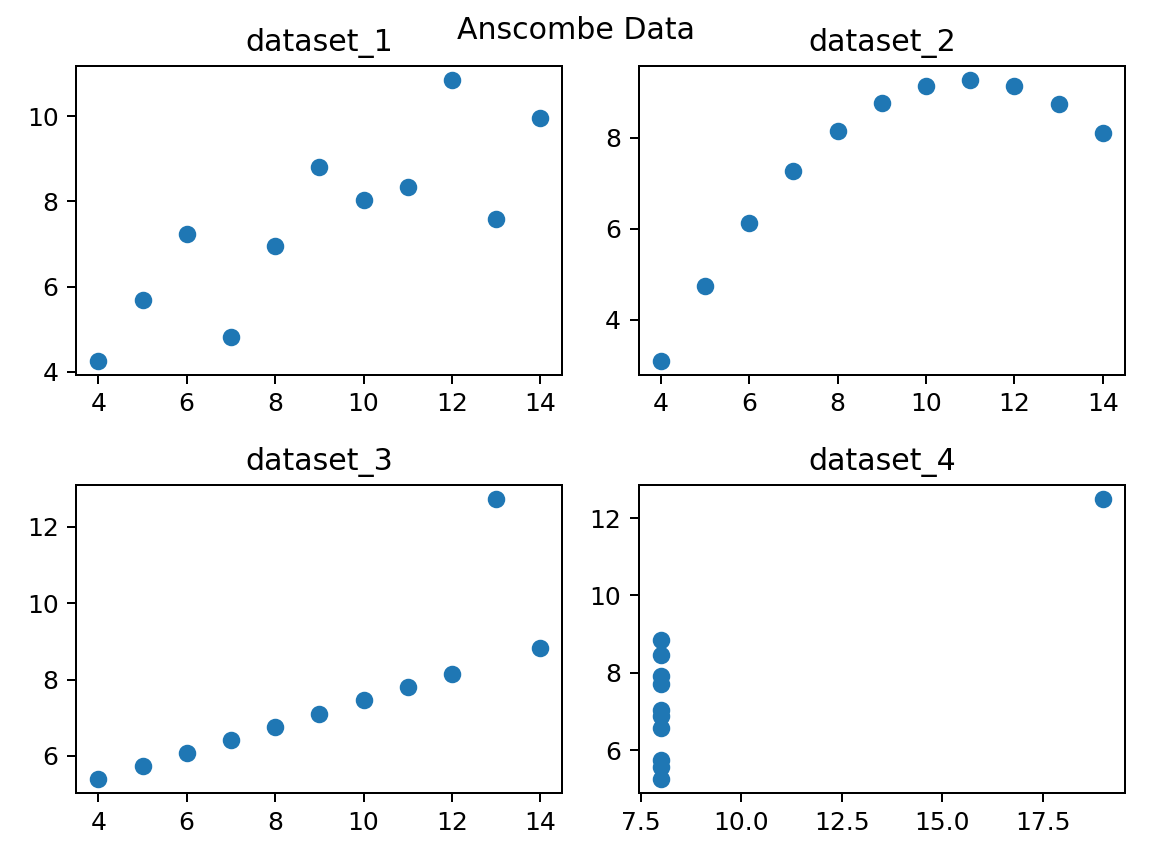

In [11]:
fig.tight_layout()

fig

## 2 matplotlib 라이브러리 자유자재로 사용하기

### 기초 그래프 그리기

#### 기초 그래프 그리기 - 히스토그램, 산점도 그래프, 박스 그래프

In [12]:
tips = sns.load_dataset('tips')

print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [13]:
print(type(tips))

<class 'pandas.core.frame.DataFrame'>


<IPython.core.display.Javascript object>


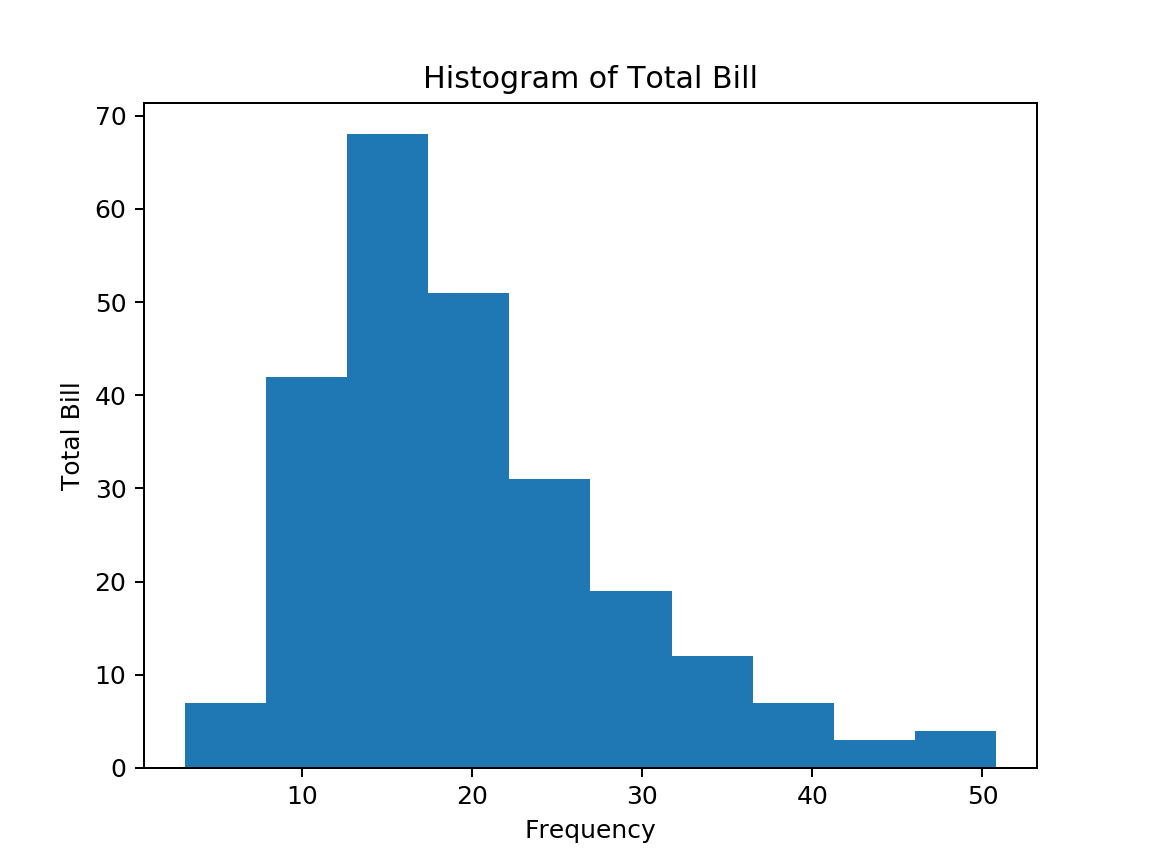

In [14]:
fig = plt.figure()

axes1 = fig.add_subplot(1, 1, 1)

<IPython.core.display.Javascript object>


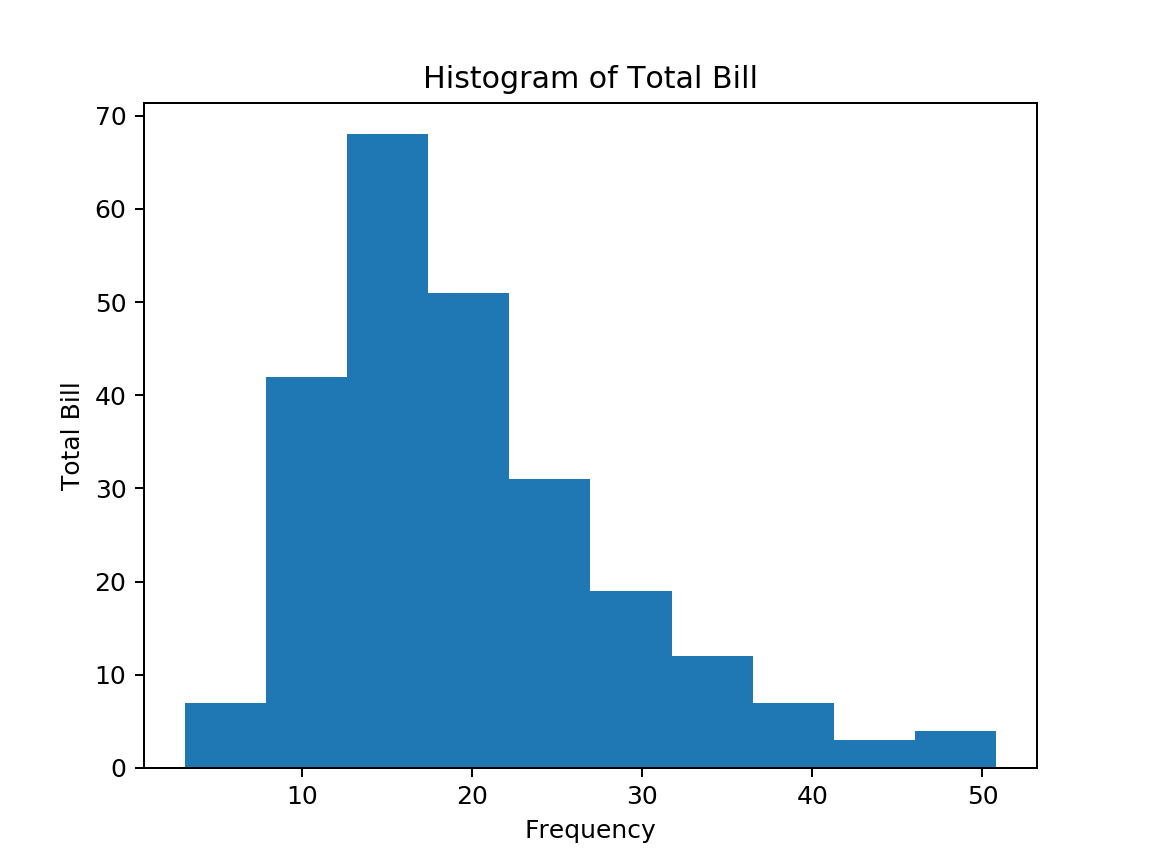

In [15]:
axes1.hist(tips['total_bill'], bins=10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

fig

<IPython.core.display.Javascript object>


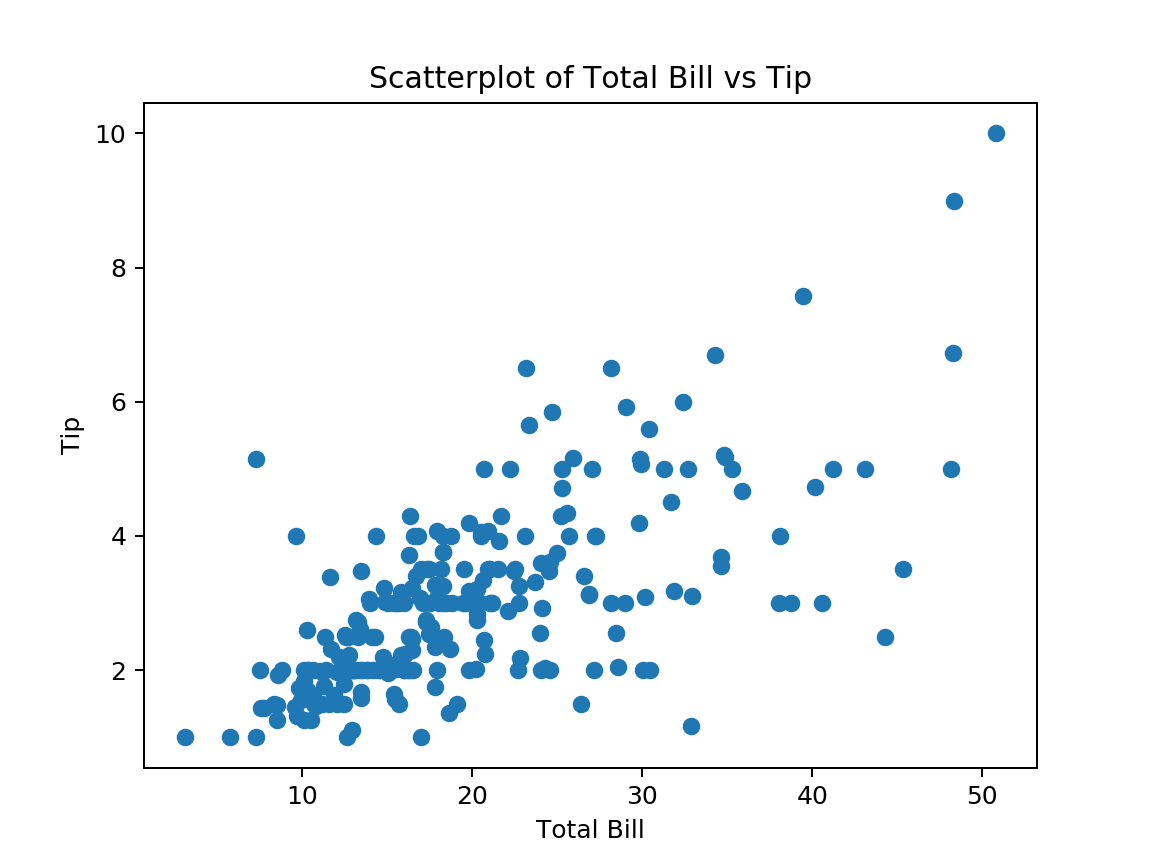

Text(0, 0.5, 'Tip')

In [17]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

<IPython.core.display.Javascript object>


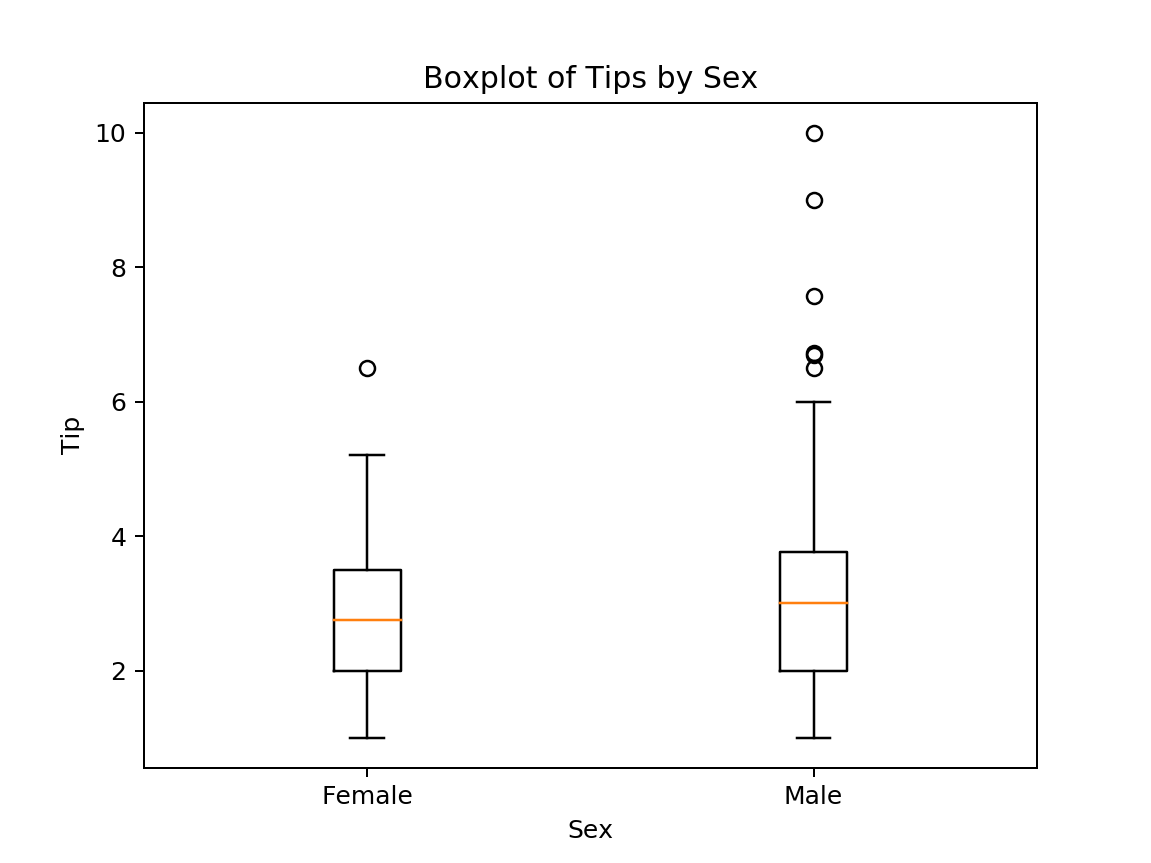

Text(0.5, 1.0, 'Boxplot of Tips by Sex')

In [18]:
boxplot = plt.figure()

axes1 = boxplot.add_subplot(1, 1, 1)
axes1.boxplot([tips[tips['sex'] == 'Female']['tip'],
              tips[tips['sex'] == 'Male']['tip']],
             labels=['Female', 'Male'])

axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')

### 다변량 그래프 그리기

#### 다변량 데이터로 다변량 그래프 그리기 - 산점도 그래프 

In [20]:
def record_sex(sex):
    if sex == 'Female':
        return 0
    else:
        return 1
    
tips['sex_color'] = tips['sex'].apply(record_sex)

In [ ]:
scatter_plot = plt.figure()

axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(
    x=tips['total_bill'],
    y=tips['tip'],
    s=tips['size'] * 10,
    c=tips['sex_color'],
    alpha=0.5
)
axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')